In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(0)

In [2]:
end_train = "2014-12-30" #last date of training/val
start_backtest = "2015-01-02"

Z_raw = pd.read_csv("data/Z_raw.csv", index_col="DATE")
Z_raw.index = pd.to_datetime(Z_raw.index)

Z = Z_raw.loc[:end_train,:] #training and validation data
Z_holdout = Z_raw.loc[start_backtest:,:] #test (or holdout) data

for col in Z.columns:
    #No holdout data is used in computing the deciles
    col_arr, col_bins = pd.qcut(Z.loc[:,col], q=10, labels=range(10), retbins=True)
    Z.loc[:, col] = pd.to_numeric(col_arr).astype(int)
    
    def map_to_quantile(val):
        return np.argmin(abs(val-col_bins[1:]))

    Z_holdout.loc[:,col] = Z_holdout.loc[:,col].apply(map_to_quantile)

Z_train, Z_val = train_test_split(Z, test_size=0.2, random_state=0)

/Users/jonathantuck/opt/anaconda3/envs/research/lib/python3.6/site-packages/pandas/core/indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/Users/jonathantuck/opt/anaconda3/envs/research/lib/python3.6/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/Users/jonathantuck/opt/anaconda3/envs/research/lib/python3.6/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A 

In [3]:
#correlation matrix over the training and validation periods
Z.corr().round(2)

,Volatility,Inflation,Mortgage
Volatility,1.00,-0.13,-0.28
Inflation,-0.13,1.00,0.28
Mortgage,-0.28,0.28,1.00


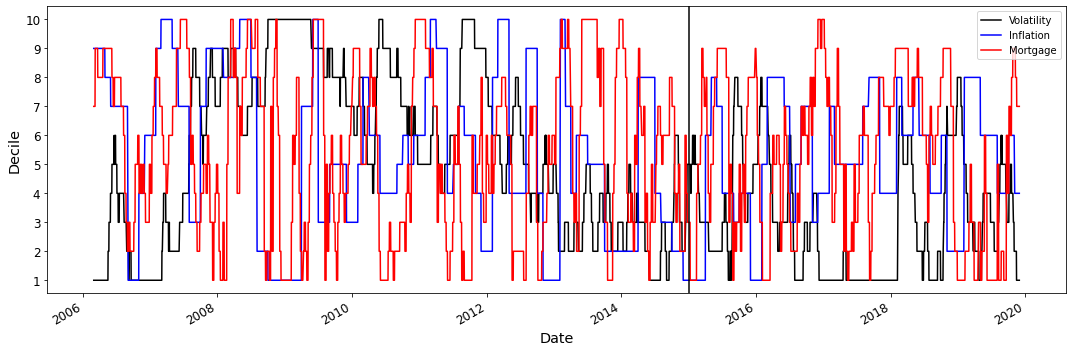

The average value of ||z_(t+1)-z_(t)||_1 = 0.35.


In [4]:
fig, ax = plt.subplots(1,1,figsize=(15,5))

pd.concat([Z, Z_holdout]).plot(ax=ax, fontsize="large", color=["black", "blue", "red"])
ax.set_xlabel("Date", fontsize="x-large")
ax.set_ylabel("Decile", fontsize="x-large")
ax.set_yticks(range(10))
ax.set_yticklabels(range(1,10+1))
plt.axvline(start_backtest, color="black")
plt.tight_layout()
plt.show()

print("The average value of ||z_(t+1)-z_(t)||_1 = {:.2f}.".format(
    Z.diff().dropna().apply(lambda x: np.linalg.norm(x,1), axis=1).mean()))